In [1]:
# Esta linea nos sirve para que los gráficos sean interactivos
# Dependiendo de su configuración puede ser necesaria o no
%matplotlib notebook
# Importamos la librería de robótica y le designamos el alias "rtb"
import roboticstoolbox as rtb
from spatialmath.base import *
from spatialmath import *
# Para manejar los ángulos, que la librería trabaja en radianes
from math import pi, inf

In [2]:
# Designo las longitudes de brazo
l1 = 3
l2 = 2

In [3]:
# Definimos el primer eslabón, sólo pasamos el parámetro a porque es el único no nulo 
# Ademas le pasamos el parametro qlim para limitar el giro
L1 = rtb.RevoluteDH(a=l1, qlim=[-pi/2, pi/2], name="Link 1")
L1

RevoluteDH(d=0, a=3, ⍺=0, name = "Link 1", qlim=[-1.57, 1.57], m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0)

In [4]:
# Lo mismo con el segundo eslabón
L2 = rtb.RevoluteDH(a=l2)
L2

RevoluteDH(d=0, a=2, ⍺=0, name = "", m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0)

In [5]:
# Finalmente, creamos el robot uniendo los eslabones recién creados
# Observar que, como a un eslabon le estableci limites, 
# todos los eslabones establecen su lìmite en -pi, +pi (360º)
robot = rtb.DHRobot([L1,L2])
robot

DHRobot: , 2 joints (RR), dynamics, standard DH parameters
┌────┬────┬────┬──────┬─────────┬────────┐
│θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │   q⁻    │   q⁺   │
├────┼────┼────┼──────┼─────────┼────────┤
│ q1 │  0 │  3 │ 0.0° │  -90.0° │  90.0° │
│ q2 │  0 │  2 │ 0.0° │ -180.0° │ 180.0° │
└────┴────┴────┴──────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

In [6]:
# Añadimos el primer punto para el robot,
# en este caso, sus dos ejes en cero.
robot.addconfiguration_attr('zero',[0,0])
robot.zero

array([0., 0.])

In [7]:
robot

DHRobot: , 2 joints (RR), dynamics, standard DH parameters
┌────┬────┬────┬──────┬─────────┬────────┐
│θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │   q⁻    │   q⁺   │
├────┼────┼────┼──────┼─────────┼────────┤
│ q1 │  0 │  3 │ 0.0° │  -90.0° │  90.0° │
│ q2 │  0 │  2 │ 0.0° │ -180.0° │ 180.0° │
└────┴────┴────┴──────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬─────┐
│name │ q0  │ q1  │
├─────┼─────┼─────┤
│zero │  0° │  0° │
└─────┴─────┴─────┘

In [8]:
# Añadimos otro punto.
# Ahora, los giros son relativos
robot.addconfiguration('t1',[pi/2,pi/4])
robot.configs['t1']

[1.5707963267948966, 0.7853981633974483]

<IPython.core.display.Javascript object>


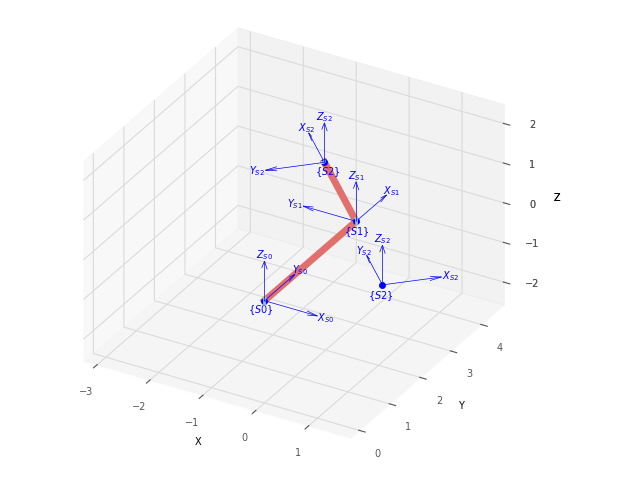

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

In [9]:
# Ploteamos la posicion t1
robot.plot(robot.configs['t1'])
trplot(SE3().A)

Vamos ahora a plotear las ternas correspondientes a cada link

In [10]:
# Importamos la libreria spatialmath, para poder plotear ternas
from spatialmath import *
from spatialmath.base import *

In [11]:
# Creamos una terna en (0,0,0) que sera nuestro origen
S0 = SE3()

In [12]:
# Ploteamos nuevamente la posicion t1
# Si no funciona, podemos agregar el parametro block = false al comando trplot
robot.plot(robot.configs['t1'])
# Ploteamos en el mismo grafico la terna S0
# Nota: el .A es porque queremos plotear la mth
trplot(S0.A, frame='S0')

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

In [13]:
# Vamos a plotear S1
# Primero, podemos dentro de una variable el angulo q1 correspondiente a la posicion t1
# ese angulo esta en la primer posicion, por eso el 0
# print(robot.t1) van a ver es una lista de angulos
q1_t1 = robot.configs['t1'][0]
# Le damos el angulo a L1, para que nos devuelva un objeto SE3,
# y despues, de ese objeto, seleccionamo la mth con .A
# Notar que como S0 es el origen, S1 = A01
S1 = L1.A(q1_t1).A
# Finalmente, ploteamos
trplot(S1, frame = 'S1')

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

In [15]:
# Repetimos el paso con S2
q2_t1 = robot.configs['t1'][1]

S2 = L2.A(q2_t1).A
trplot(S2, frame = 'S2')

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

# Pregunta para pensar: por que S2 no esta bien graficada??
## Intenten arreglar el problema